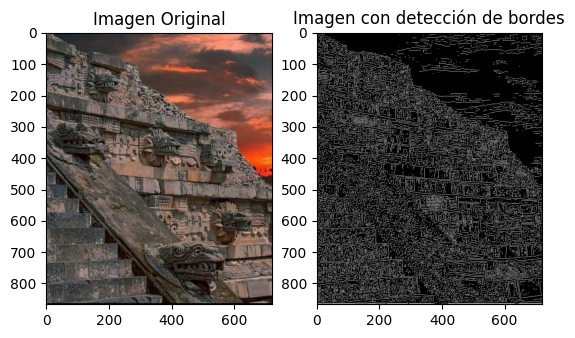

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

def canny_edge_detection(image, sigma=1, low_threshold=50, high_threshold=150):
    # Conversion de la imagen a escala de grises
    gray_image = np.mean(image, axis=2)
    
    # Aplicación del suavizado por filtro gaussiano
    smoothed_image = ndimage.gaussian_filter(gray_image, sigma)
    
    # Calculo de los gradientes utilizando el algoritmo Sobel
    gradient_x = ndimage.sobel(smoothed_image, axis=1)
    gradient_y = ndimage.sobel(smoothed_image, axis=0)
    
    # Calculo del módulo y la dirección del gradiente
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    gradient_direction = np.arctan2(gradient_y, gradient_x)
    
    # Supresión de no máximos
    suppressed_image = np.copy(gradient_magnitude)
    for i in range(1, gradient_magnitude.shape[0]-1):
        for j in range(1, gradient_magnitude.shape[1]-1):
            angle = gradient_direction[i, j]
            if (angle >= -np.pi/8 and angle <= np.pi/8) or (angle >= 7*np.pi/8) or (angle <= -7*np.pi/8):
                if (gradient_magnitude[i, j] <= gradient_magnitude[i, j+1]) or (gradient_magnitude[i, j] <= gradient_magnitude[i, j-1]):
                    suppressed_image[i, j] = 0
            elif (angle >= np.pi/8 and angle <= 3*np.pi/8) or (angle <= -5*np.pi/8 and angle >= -7*np.pi/8):
                if (gradient_magnitude[i, j] <= gradient_magnitude[i-1, j+1]) or (gradient_magnitude[i, j] <= gradient_magnitude[i+1, j-1]):
                    suppressed_image[i, j] = 0
            elif (angle >= -3*np.pi/8 and angle <= -np.pi/8) or (angle >= 5*np.pi/8 and angle <= 7*np.pi/8):
                if (gradient_magnitude[i, j] <= gradient_magnitude[i-1, j-1]) or (gradient_magnitude[i, j] <= gradient_magnitude[i+1, j+1]):
                    suppressed_image[i, j] = 0
            else:
                if (gradient_magnitude[i, j] <= gradient_magnitude[i-1, j]) or (gradient_magnitude[i, j] <= gradient_magnitude[i+1, j]):
                    suppressed_image[i, j] = 0
    
    # Umbralización por histéresis
    edge_map = np.zeros_like(suppressed_image, dtype=np.uint8)
    edge_map[(suppressed_image >= high_threshold)] = 255
    
    # Etiquetar píxeles conectados a través de histéresis
    labeled_regions, num_features = ndimage.label(suppressed_image > low_threshold)
    
    # Identificar las regiones conectadas que están por encima del umbral bajo y etiquetarlas como bordes
    for i in range(1, num_features + 1):
        region_indices = np.where(labeled_regions == i)
        edge_map[region_indices] = 255
    
    return edge_map

# Carga de la imagen
image = plt.imread('Images/Test.jpg')

# Realizar la detección de bordes
edges = canny_edge_detection(image, sigma=1.4, low_threshold=20, high_threshold=50)

# Mostrar la imagen original
plt.figure(1)
plt.subplot(121)
plt.imshow(image)
plt.title("Imagen Original")

# Mostrar la imagen con detección de bordes
plt.subplot(122)
plt.imshow(edges, cmap='gray')
plt.title("Imagen con detección de bordes")
plt.show()